In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [73]:
numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
targets = pd.read_csv('target.csv')

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numerical)

In [75]:
X = numerical_scaled
y = targets['TARGET_B']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection  import chi2
kbest = SelectKBest(chi2, k=20).fit_transform(X, y)
selected = pd.DataFrame(kbest)
# selected.head()

In [111]:
# To check the scores
model = SelectKBest(chi2, k=20).fit(X, y)
df = pd.DataFrame(data = model.scores_, columns = ['score'])
df['Column'] = numerical.columns

# df.sort_values(by = ['score'], ascending = False).head(40)

In [77]:
nw_df =numerical[['RFA_2F','CARDGIFT','HVP1','ETH2','RP1','NGIFTALL','HV1','ETHC5','CARDPROM','NUMPROM','RP3','CLUSTER2','INCOME','IC15','MSA','CONTROLN','HHAS4','HC6','POBC2','MHUC1']]

In [78]:
new_df = pd.DataFrame(nw_df)

In [79]:
all_data = pd.concat((new_df,targets),axis=1)
data_B = all_data.drop(['TARGET_D'], axis=1)

In [80]:
# X/y split
X = data_B.drop('TARGET_B',axis = 1)
y = data_B['TARGET_B']

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [82]:
train=pd.concat((X_train,y_train),axis=1)

In [83]:
train = pd.DataFrame(train)

In [84]:
from sklearn.utils import resample

category_0 = train[data_B['TARGET_B'] == 0]
category_1 = train[data_B['TARGET_B'] == 1]

C:\Users\moshi\AppData\Local\Temp/ipykernel_29068/2834848187.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category_0 = train[data_B['TARGET_B'] == 0]
C:\Users\moshi\AppData\Local\Temp/ipykernel_29068/2834848187.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category_1 = train[data_B['TARGET_B'] == 1]


In [85]:
#upsampling

# we create a category 1 oversampeled. we are creating the same rows like in category 0
category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0))

In [86]:
# and now we have the same shape
print(category_0.shape)
print(category_1_oversampled.shape)

(67925, 21)
(67925, 21)


In [87]:
data_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)

In [88]:
data_upsampled['TARGET_B'].value_counts()

0    67925
1    67925
Name: TARGET_B, dtype: int64

In [89]:
X_train = data_upsampled.drop('TARGET_B',axis = 1)
y_train = data_upsampled['TARGET_B']

In [90]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=40)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=40)

In [91]:
print("test data accuracy was ",model.score(X_test,y_test))
# 100% on training data
print("train data accuracy was ",model.score(X_train,y_train))

test data accuracy was  0.9008929694378066
train data accuracy was  0.9989547294810452


In [92]:
max_depth = range(1,30)
test = []
train = []

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    test.append(model.score(X_test,y_test))
    train.append(model.score(X_train,y_train))

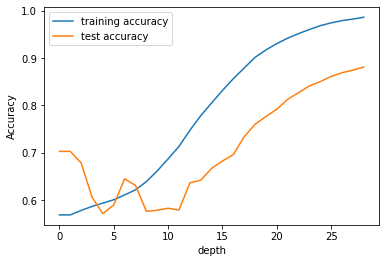

In [93]:
import matplotlib.pyplot as plt
plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("depth")
plt.legend()

In [94]:
model = DecisionTreeClassifier(max_depth = 40)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=40)

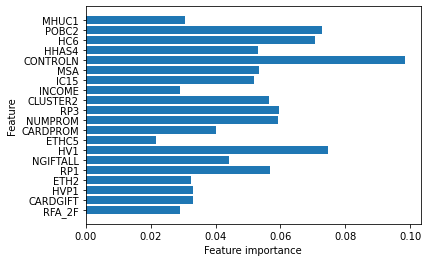

In [59]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(model)

In [ ]:
# oversampling helped me get better test result but I had to use a big depth (40) and I don't know if it's wrong

# Random forest Lab

In [65]:
#building a classification model:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

#some are the same parameterd like in decision tree
clf = RandomForestClassifier(max_depth=5,              #max number of questions
                             min_samples_split=20,     # amount of rows still considerd at every question
                             min_samples_leaf =20,     #ultimate answer based on at least this many rows
                             max_samples=0.8,   #fraction of x-train to use in each tree, better to try and use smaller values usually
                             random_state = 42)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.9492726281809416
0.9491468578375886


0    22640
1     1213
Name: TARGET_B, dtype: int64

array([[22640,     0],
       [ 1213,     0]], dtype=int64)

In [105]:
# targets['TARGET_D'] = targets['TARGET_D'].apply(np.int64)
# targets['TARGET_D'].dtype

dtype('int64')

In [106]:
# X = numerical_scaled
# y = targets['TARGET_D']

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection  import chi2
# kbest = SelectKBest(chi2, k=20).fit_transform(X, y)
# selected = pd.DataFrame(kbest)
# # selected.head()

In [110]:
# # To check the scores
# model = SelectKBest(chi2, k=20).fit(X, y)
# df = pd.DataFrame(data = model.scores_, columns = ['score'])
# df['Column'] = numerical.columns

# # df.sort_values(by = ['score'], ascending = False).head(40)

In [108]:
# df_d =numerical[['RFA_2F','HVP1','CARDGIFT','HVP6','RP1','NGIFTALL','POP90C2','HV1','HC15','HPHONE_D','CLUSTER2','IC23','POP90C3','ETH2','CARDPROM','LASTGIFT','DW6','INCOME','HUPA2']]

In [109]:
# df_d = pd.DataFrame(df_d)

In [112]:
# all_data = pd.concat((df_d,targets),axis=1)
# data_D = all_data.drop(['TARGET_B'], axis=1)

In [114]:
# # X/y split
# X = data_D.drop('TARGET_D',axis = 1)
# y = data_D['TARGET_D']

In [115]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y)

In [116]:
# train=pd.concat((X_train,y_train),axis=1)

In [117]:
# train = pd.DataFrame(train)

In [118]:
# #upsampling

# # we create a category 1 oversampeled. we are creating the same rows like in category 0
# category_1_oversampled = resample(category_1, 
#                                   replace=True, 
#                                   n_samples = len(category_0))

In [119]:
# # and now we have the same shape
# print(category_0.shape)
# print(category_1_oversampled.shape)

(67925, 21)
(67925, 21)


In [120]:
# data_upsampled_d = pd.concat([category_0, category_1_oversampled], axis=0)